In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

df=pd.read_csv('C:/Users/dheve/OneDrive/Desktop/ml_assignment/Clustering/EastWestAirlines.csv')

In [2]:
df.columns

Index(['ID#', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?'],
      dtype='object')

In [3]:
# Check for missing values
df.isnull().sum()


ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [4]:
df.describe()

ID#       Balance    Qual_miles    cc1_miles    cc2_miles  \
count  3999.000000  3.999000e+03   3999.000000  3999.000000  3999.000000   
mean   2014.819455  7.360133e+04    144.114529     2.059515     1.014504   
std    1160.764358  1.007757e+05    773.663804     1.376919     0.147650   
min       1.000000  0.000000e+00      0.000000     1.000000     1.000000   
25%    1010.500000  1.852750e+04      0.000000     1.000000     1.000000   
50%    2016.000000  4.309700e+04      0.000000     1.000000     1.000000   
75%    3020.500000  9.240400e+04      0.000000     3.000000     1.000000   
max    4021.000000  1.704838e+06  11148.000000     5.000000     3.000000   

         cc3_miles    Bonus_miles  Bonus_trans  Flight_miles_12mo  \
count  3999.000000    3999.000000   3999.00000        3999.000000   
mean      1.012253   17144.846212     11.60190         460.055764   
std       0.195241   24150.967826      9.60381        1400.209171   
min       1.000000       0.000000      0.00000           0.000000   
25%       1.000000    1250.000000      3.00000           0.000000   
50%       1.000000    7171.000000     12.00000           0.000000   
75%       1.000000   23800.500000     17.00000         311.000000   
max       5.000000  263685.000000     86.00000       30817.000000   

       Flight_trans_12  Days_since_enroll       Award?  
count      3999.000000         3999.00000  3999.000000  
mean          1.373593         4118.55939     0.370343  
std           3.793172         2065.13454     0.482957  
min           0.000000            2.00000     0.000000  
25%           0.000000         2330.00000     0.000000  
50%           0.000000         4096.00000     0.000000  
75%           1.000000         5790.50000     1.000000  
max          53.000000         8296.00000     1.000000

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [6]:
df.head()

ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0    1    28143           0          1          1          1          174   
1    2    19244           0          1          1          1          215   
2    3    41354           0          1          1          1         4123   
3    4    14776           0          1          1          1          500   
4    5    97752           0          4          1          1        43300   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award?  
0            1                  0                0               7000       0  
1            2                  0                0               6968       0  
2            4                  0                0               7034       0  
3            1                  0                0               6952       0  
4           26               2077                4               6935       1

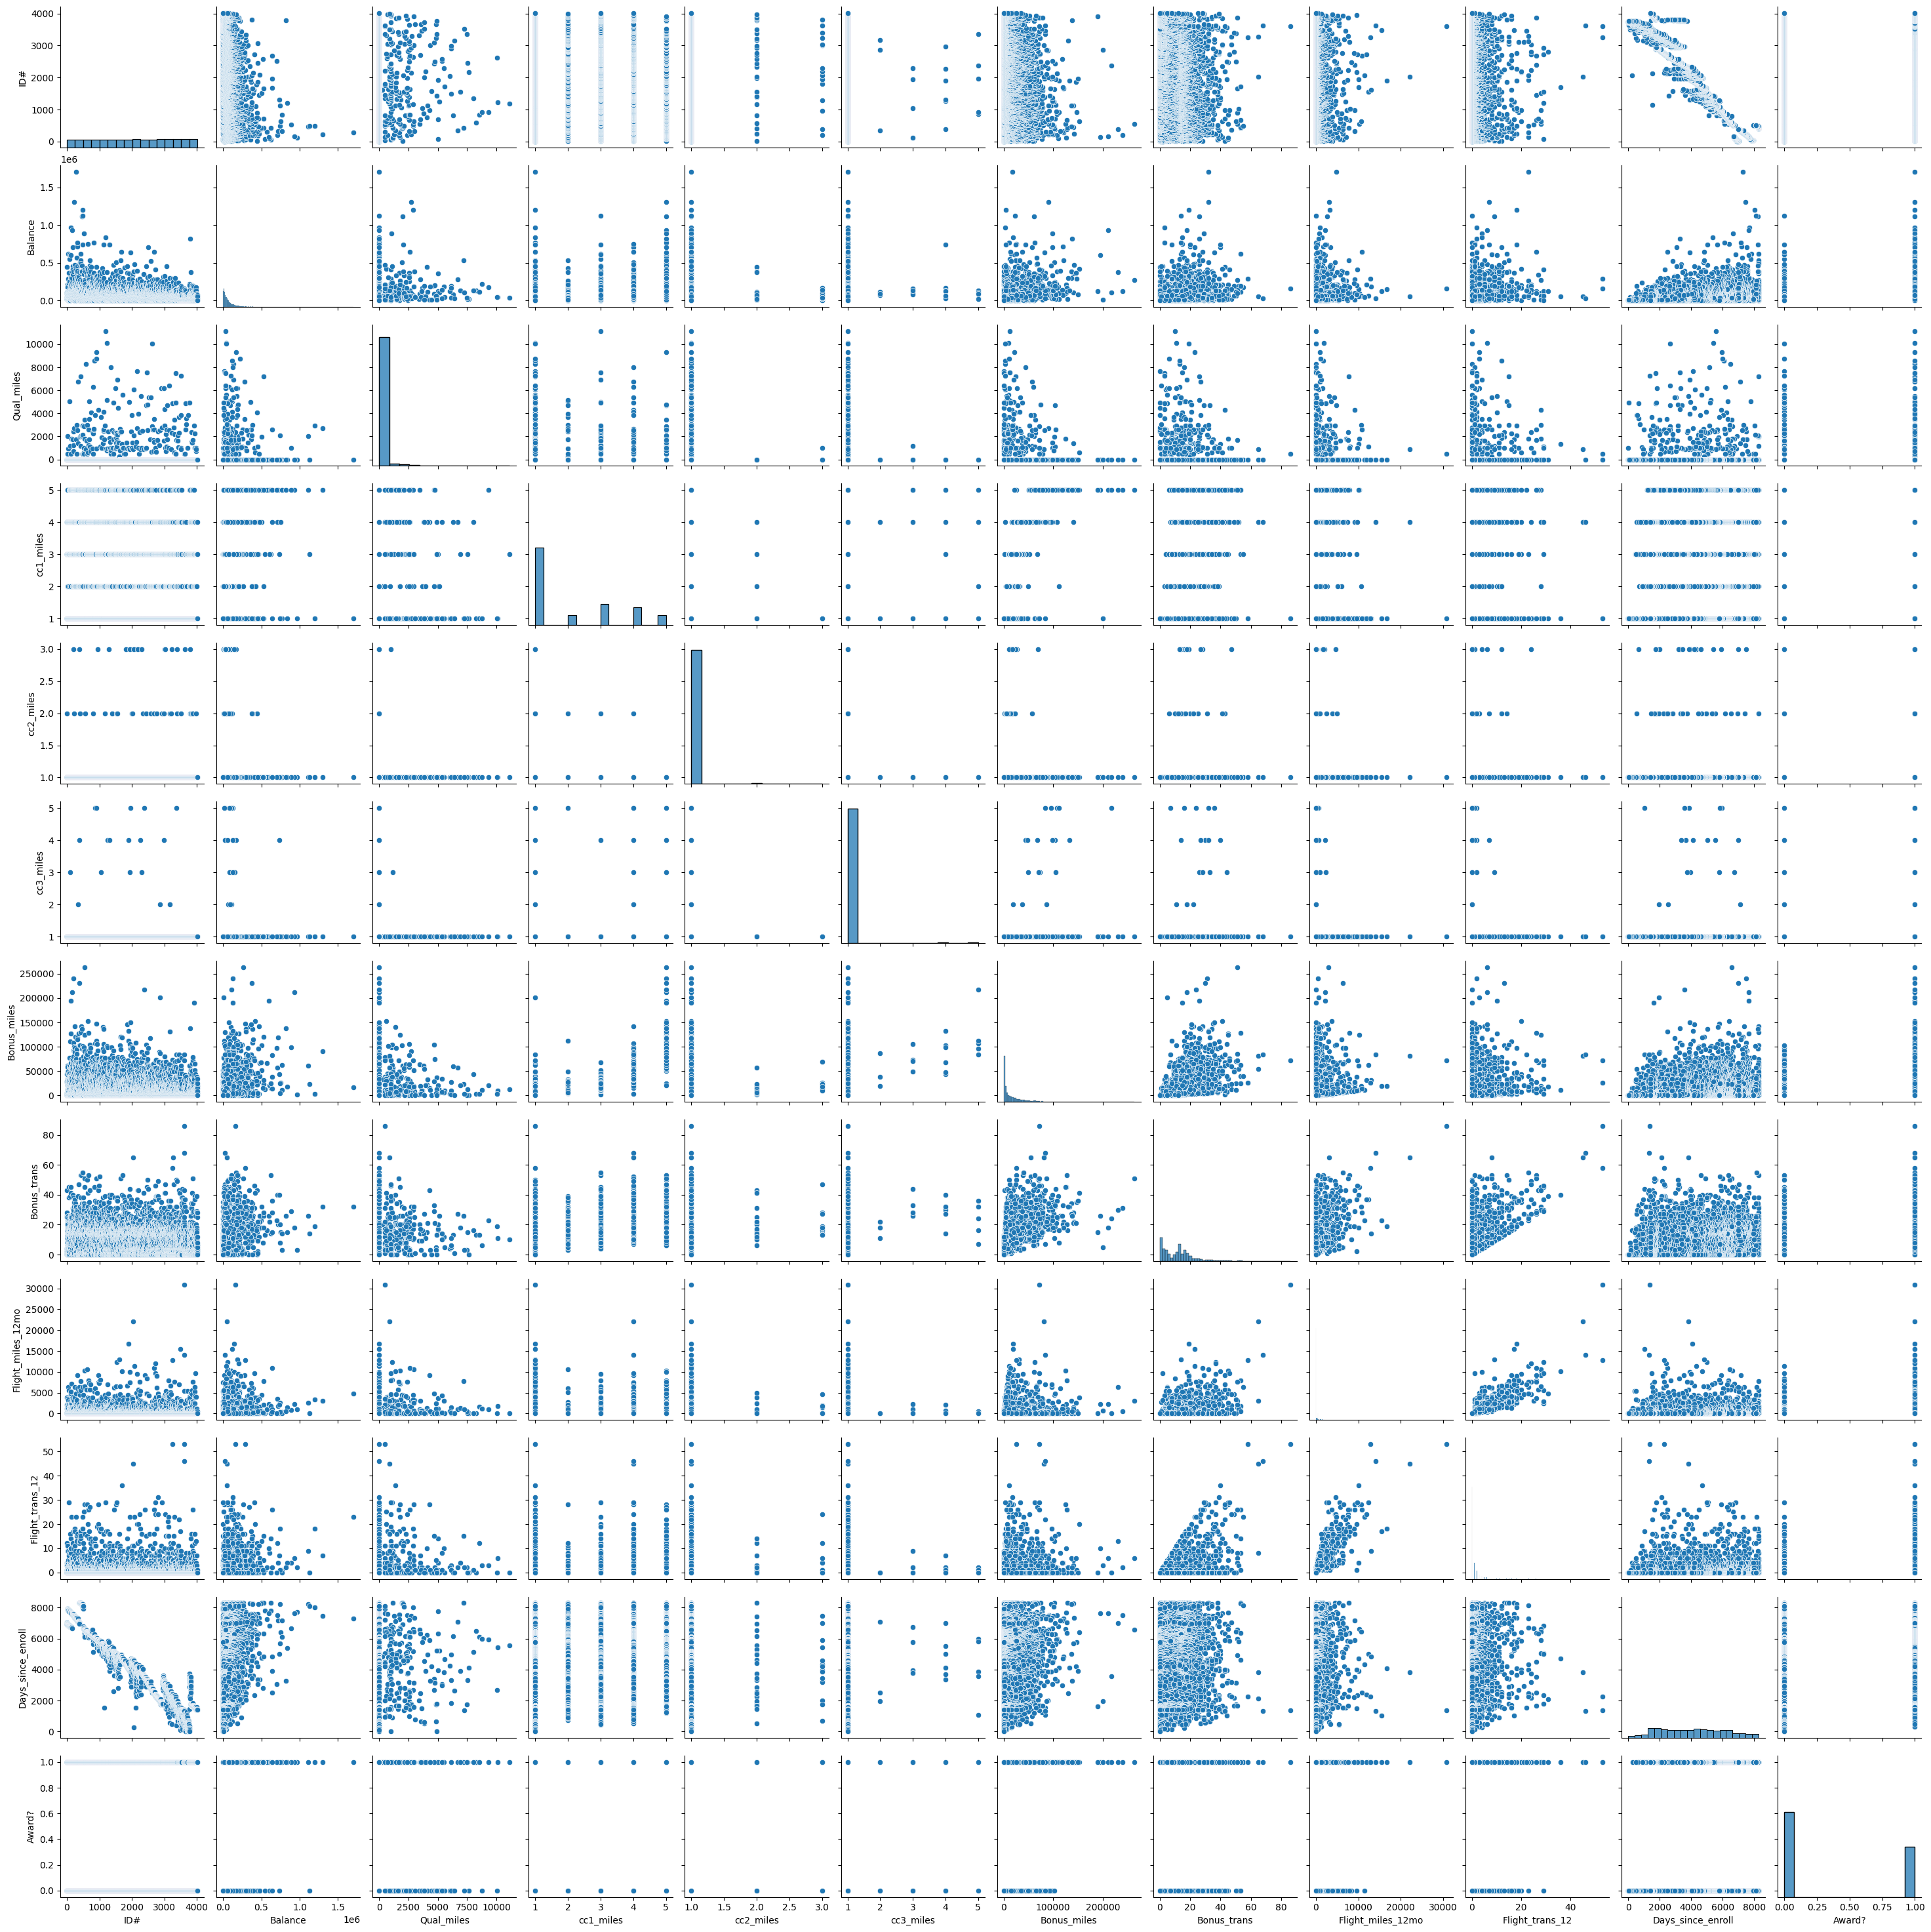

In [7]:
# Pairplot for feature relationships
sns.pairplot(df.select_dtypes(include=[np.number]))
plt.show()


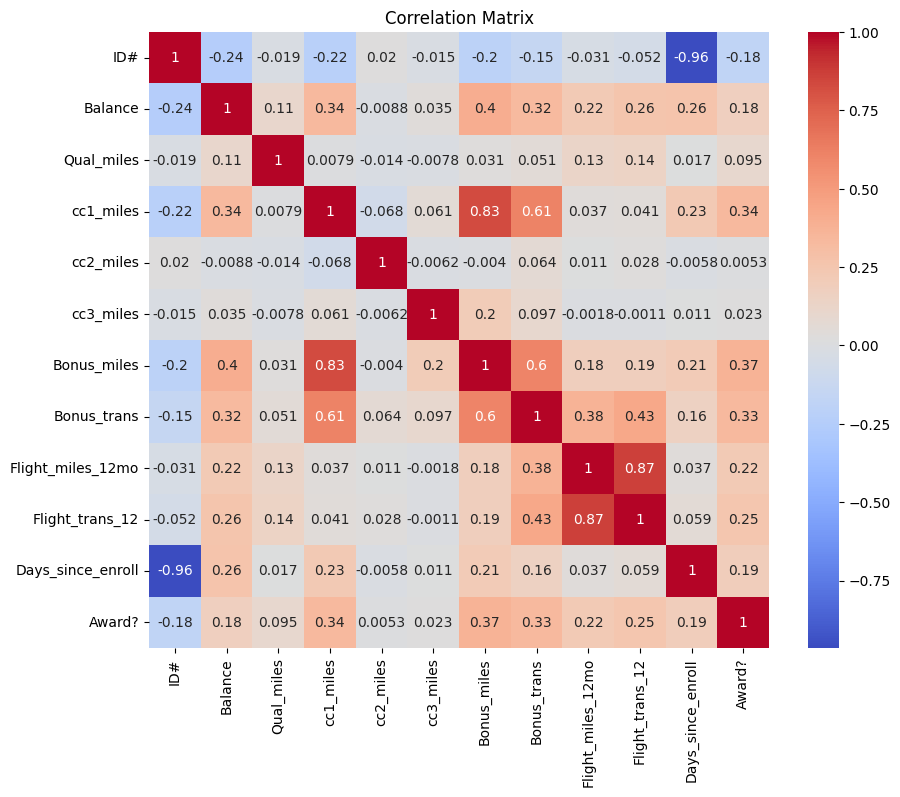

In [8]:
data=df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(data, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

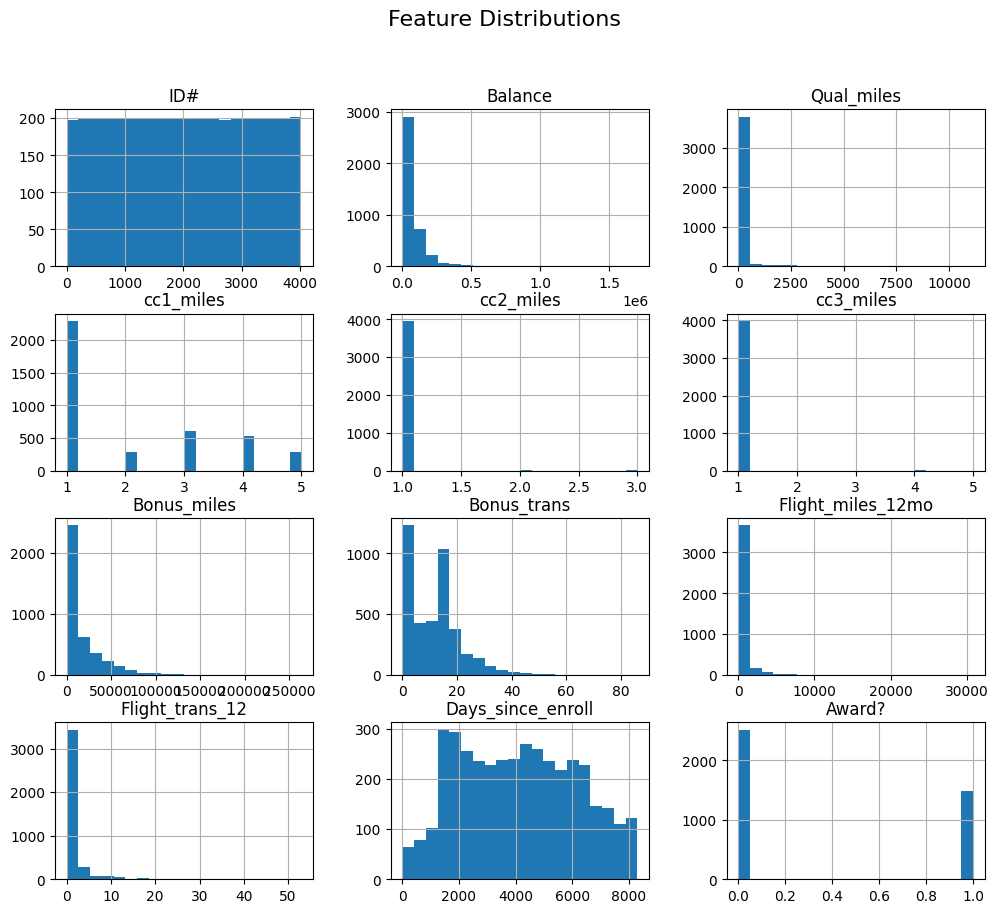

In [9]:
df.hist(figsize=(12, 10), bins=20)
plt.suptitle('Feature Distributions', fontsize=16)
plt.show()

In [10]:
# Select features for clustering (only numerical ones in this example)
clustering_data = df  # Already scaled


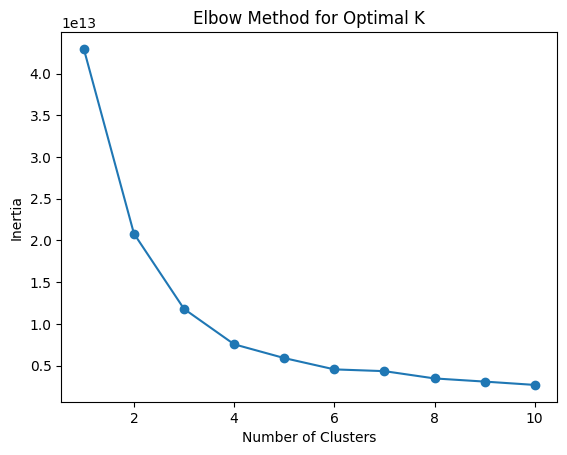

In [11]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Elbow Method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)  # X_scaled is your preprocessed data
    inertia.append(kmeans.inertia_)

# Plot Elbow Curve
import matplotlib.pyplot as plt
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()


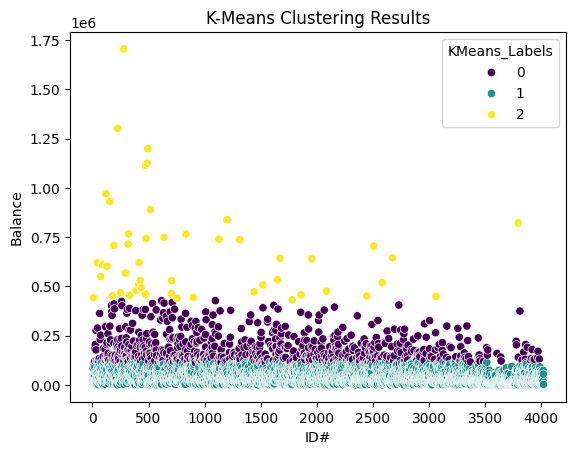

In [12]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['KMeans_Labels'] = kmeans.fit_predict(df)

# Visualize the clusters
sns.scatterplot(x=df.iloc[:, 0], y=df.iloc[:, 1], hue=df['KMeans_Labels'], palette='viridis')
plt.title("K-Means Clustering Results")
plt.show()

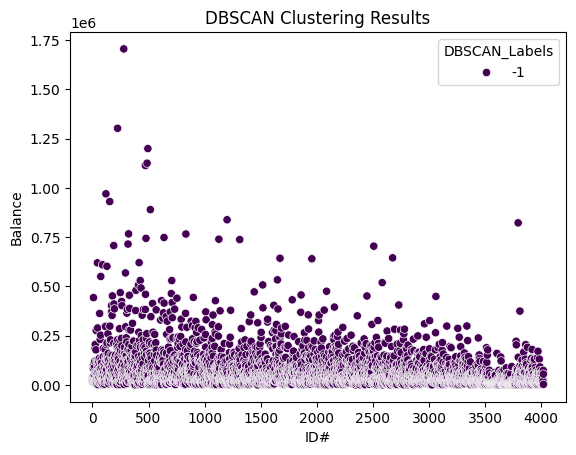

In [13]:
# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Adjust eps and min_samples for better clustering
df['DBSCAN_Labels'] = dbscan.fit_predict(df)

# Visualize the clusters from DBSCAN
sns.scatterplot(x=df.iloc[:, 0], y=df.iloc[:, 1], hue=df['DBSCAN_Labels'], palette='viridis')
plt.title("DBSCAN Clustering Results")
plt.show()


In [14]:
# K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['KMeans_Labels'] = kmeans.fit_predict(df)  # scaled_df is the scaled feature set

# Check if the column is successfully added to the DataFrame
print(df.head())  # This will show the first few rows of the DataFrame including the 'KMeans_Labels' column


   ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0    1    28143           0          1          1          1          174   
1    2    19244           0          1          1          1          215   
2    3    41354           0          1          1          1         4123   
3    4    14776           0          1          1          1          500   
4    5    97752           0          4          1          1        43300   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award?  \
0            1                  0                0               7000       0   
1            2                  0                0               6968       0   
2            4                  0                0               7034       0   
3            1                  0                0               6952       0   
4           26               2077                4               6935       1   

   KMeans_Labels  DBSCAN_Labels  
0              1

In [15]:
from sklearn.cluster import AgglomerativeClustering

# Apply hierarchical clustering (using 'ward' linkage method)
hierarchical = AgglomerativeClustering(n_clusters=3, linkage='ward')
df['Hierarchical_Labels'] = hierarchical.fit_predict(df)  # Add the labels to the DataFrame

# Check if the column has been added successfully
print(df.head())  # Verify that 'Hierarchical_Labels' column exists


   ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0    1    28143           0          1          1          1          174   
1    2    19244           0          1          1          1          215   
2    3    41354           0          1          1          1         4123   
3    4    14776           0          1          1          1          500   
4    5    97752           0          4          1          1        43300   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award?  \
0            1                  0                0               7000       0   
1            2                  0                0               6968       0   
2            4                  0                0               7034       0   
3            1                  0                0               6952       0   
4           26               2077                4               6935       1   

   KMeans_Labels  DBSCAN_Labels  Hierarchical_Labe

In [16]:
# K-Means Cluster Analysis
for i in range(3):
    print(f"K-Means Cluster {i}:")
    print(df[df['KMeans_Labels'] == i].mean())
    print("\n")

# Hierarchical Cluster Analysis
for i in range(3):
    print(f"Hierarchical Cluster {i}:")
    print(df[df['Hierarchical_Labels'] == i].mean())
    print("\n")

# DBSCAN Cluster Analysis
for i in np.unique(df['DBSCAN_Labels']):
    print(f"DBSCAN Cluster {i}:")
    print(df[df['DBSCAN_Labels'] == i].mean())
    print("\n")


K-Means Cluster 0:
ID#                      1519.353607
Balance                188000.250354
Qual_miles                285.322489
cc1_miles                   3.055163
cc2_miles                   1.009901
cc3_miles                   1.029703
Bonus_miles             36035.135785
Bonus_trans                17.650636
Flight_miles_12mo         997.294201
Flight_trans_12             2.878359
Days_since_enroll        5032.983027
Award?                      0.504950
KMeans_Labels               0.000000
DBSCAN_Labels              -1.000000
Hierarchical_Labels         0.479491
dtype: float64


K-Means Cluster 1:
ID#                     2139.382480
Balance                39462.146823
Qual_miles               106.846700
cc1_miles                  1.825416
cc2_miles                  1.015423
cc3_miles                  1.007711
Bonus_miles            12512.203578
Bonus_trans               10.148365
Flight_miles_12mo        324.614744
Flight_trans_12            0.979642
Days_since_enroll       3886.1

In [20]:
# Evaluate K-Means clustering using silhouette score
kmeans_silhouette = silhouette_score(df, df['KMeans_Labels'])
print(f"K-Means Silhouette Score: {kmeans_silhouette}")

# Evaluate Hierarchical clustering using silhouette score
hierarchical_silhouette = silhouette_score(df, df['Hierarchical_Labels'])
print(f"Hierarchical Silhouette Score: {hierarchical_silhouette}")




K-Means Silhouette Score: 0.6493060301815993
Hierarchical Silhouette Score: 0.6988370660043178


In [22]:
def evaluate_dbscan(data: np.ndarray, labels: np.ndarray) -> dict:
   
    metrics = {}
    
    # Calculate number of clusters and noise points
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)
    
    metrics['n_clusters'] = n_clusters
    metrics['n_noise'] = n_noise
    metrics['noise_ratio'] = n_noise / len(labels)
    
    # Handle cases with noise points
    mask = labels != -1
    if not mask.any():
        metrics['silhouette'] = np.nan
        metrics['status'] = "All points classified as noise"
        return metrics
    
    # Calculate silhouette score for non-noise points
    if n_clusters > 1:
        data_clean = data[mask]
        labels_clean = labels[mask]
        metrics['silhouette'] = silhouette_score(data_clean, labels_clean)
        metrics['status'] = "Success"
    else:
        metrics['silhouette'] = np.nan
        metrics['status'] = "Insufficient clusters for silhouette score"
    
    return metrics

def visualize_dbscan_evaluation(data: np.ndarray, labels: np.ndarray, 
                              metrics: dict, figsize=(12, 5)) -> None:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)
    
    # Plot 1: Cluster distribution including noise
    unique_labels = np.unique(labels)
    cluster_sizes = pd.Series(labels).value_counts().sort_index()
    
    colors = ['red' if i == -1 else 'blue' for i in cluster_sizes.index]
    cluster_sizes.plot(kind='bar', ax=ax1, color=colors)
    ax1.set_title('Cluster Size Distribution')
    ax1.set_xlabel('Cluster Label (-1 is noise)')
    ax1.set_ylabel('Number of Points')
    
    # Plot 2: Metrics summary
    metrics_to_plot = {
        'Noise Ratio': metrics['noise_ratio'],
        'Silhouette Score': metrics['silhouette'] if not np.isnan(metrics['silhouette']) else 0
    }
    
    ax2.bar(metrics_to_plot.keys(), metrics_to_plot.values())
    ax2.set_title('DBSCAN Metrics')
    ax2.set_ylim(0, 1)
    
    for i, v in enumerate(metrics_to_plot.values()):
        if not np.isnan(v):
            ax2.text(i, v + 0.01, f'{v:.3f}', ha='center')
    
    plt.tight_layout()
    
def print_dbscan_summary(metrics: dict) -> None:
    print("\nDBSCAN Clustering Summary:")
    print("-" * 30)
    print(f"Status: {metrics['status']}")
    print(f"Number of clusters: {metrics['n_clusters']}")
    print(f"Number of noise points: {metrics['n_noise']}")
    print(f"Noise ratio: {metrics['noise_ratio']:.3f}")
    if not np.isnan(metrics['silhouette']):
        print(f"Silhouette score: {metrics['silhouette']:.3f}")

In [24]:
# Evaluate DBSCAN results
metrics = evaluate_dbscan(df.values, df['DBSCAN_Labels'].values)

# Print detailed summary
print_dbscan_summary(metrics)




DBSCAN Clustering Summary:
------------------------------
Status: All points classified as noise
Number of clusters: 0
Number of noise points: 3999
Noise ratio: 1.000
